In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [44]:
df_main = pd.read_csv('all_data.csv')
df_main.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [45]:
print(df_main.shape)
#df_main = df_main.rename(columns={'Life expectancy at birth (years)': 'Life Expectancy'})
print(df_main.columns)
print(df_main.describe())
print(df_main.info())

(96, 4)
Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')
              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year   

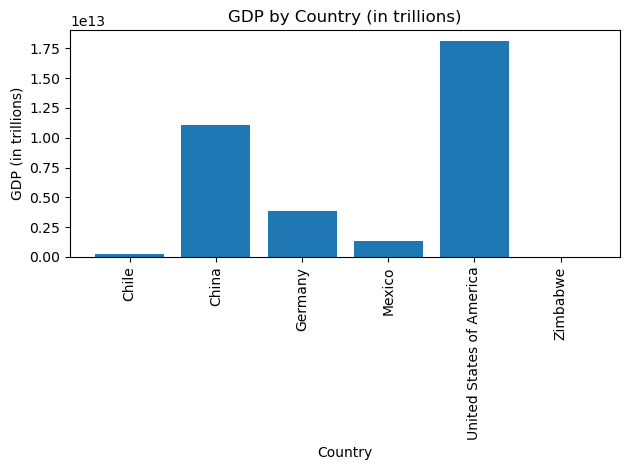

In [46]:
plt.bar(df_main['Country'], df_main['GDP'])
plt.xticks(rotation=90)
plt.title('GDP by Country (in trillions)')
plt.xlabel('Country')
plt.ylabel('GDP (in trillions)')
plt.tight_layout()
plt.show()


                                   GDP
Country                               
Chile                     1.697888e+11
China                     4.957714e+12
Germany                   3.094776e+12
Mexico                    9.766506e+11
United States of America  1.407500e+13
Zimbabwe                  9.062580e+09                           Life expectancy at birth (years)
Country                                                   
Chile                                             78.94375
China                                             74.26250
Germany                                           79.65625
Mexico                                            75.71875
United States of America                          78.06250
Zimbabwe                                          50.09375


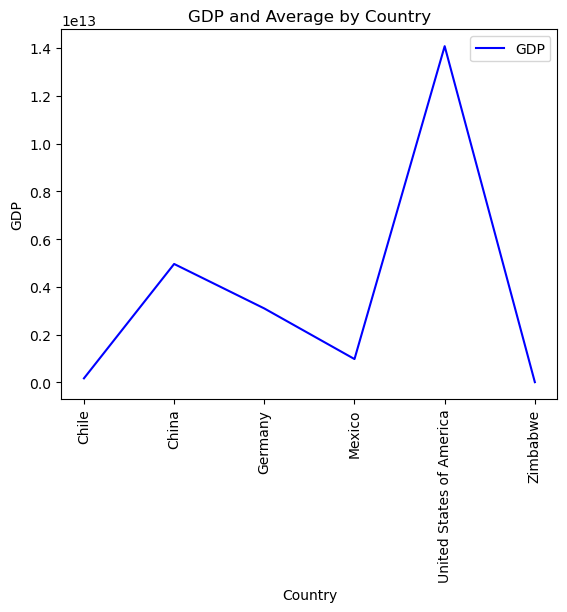

In [47]:
df_gdp_mean = df_main.groupby('Country').agg({'GDP':'mean'})
df_gdp_mean_values = df_gdp_mean.values
df_le_mean = df_main.groupby('Country').agg({'Life expectancy at birth (years)':'mean'})
df_le_mean_values = df_le_mean.values.flatten()
print(df_gdp_mean, df_le_mean)

# 

plt.plot(df_gdp_mean.index, df_gdp_mean_values, color='blue', label='GDP')
# plt.plot(df_le_mean.index, df_le_mean_values, color='orange', label='Life Expectancy')
plt.legend()
plt.title('GDP and Average by Country')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()




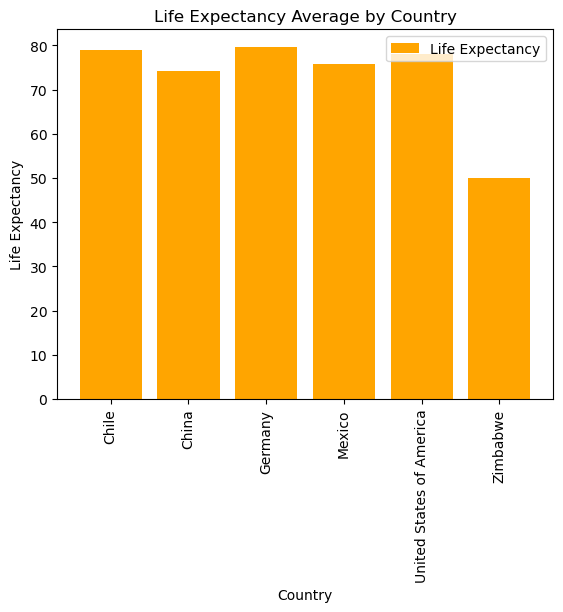

In [48]:
plt.bar(df_le_mean.index, df_le_mean_values, color='orange', label='Life Expectancy')
plt.legend()
plt.title('Life Expectancy Average by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

C:\Users\jander7\AppData\Local\Temp\ipykernel_3256\1941413949.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Life expectancy at birth (years)', y='Country', data=df_main, palette='muted')


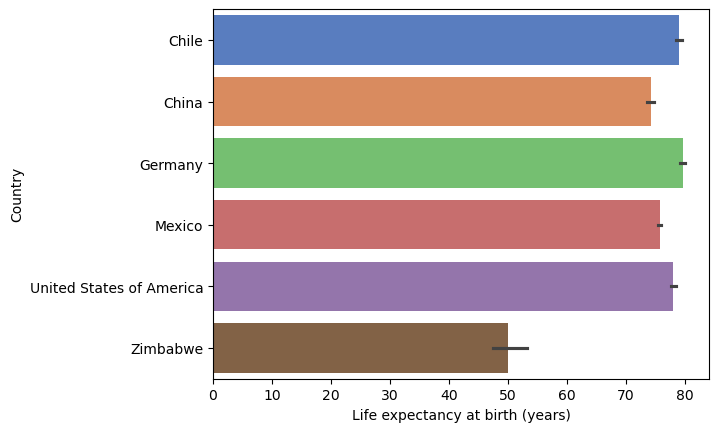

In [49]:
sns.barplot(x='Life expectancy at birth (years)', y='Country', data=df_main, palette='muted')
plt.show()

In [50]:
year_GDP = df_main.groupby(['Year', 'Country']).agg({'GDP':'mean'}).reset_index()
year_GDP

,Year,Country,GDP
0,2000,Chile,7.786093e+10
1,2000,China,1.211350e+12
2,2000,Germany,1.949950e+12
3,2000,Mexico,6.836480e+11
4,2000,United States of America,1.030000e+13
...,...,...,...
91,2015,China,1.106470e+13
92,2015,Germany,3.375610e+12
93,2015,Mexico,1.152260e+12
94,2015,United States of America,1.810000e+13


<Axes: xlabel='Year', ylabel='GDP'>

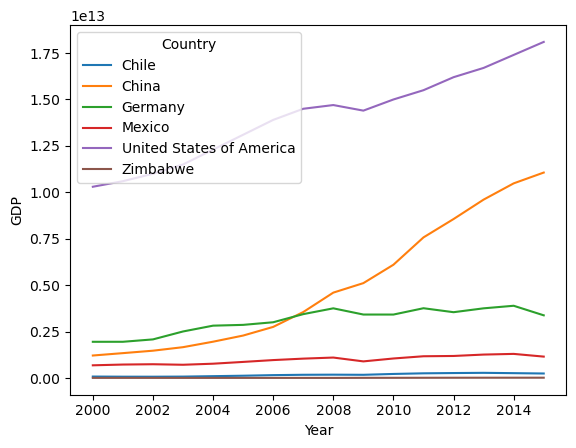

In [51]:
# plt.scatter(year_GDP['Year'], year_GDP['GDP'], color = year_GDP['Country'], label ='GDP')
# plt.show()
sns.lineplot(x='Year', y='GDP', hue='Country', data=year_GDP)

<Axes: xlabel='Year', ylabel='Life expectancy at birth (years)'>

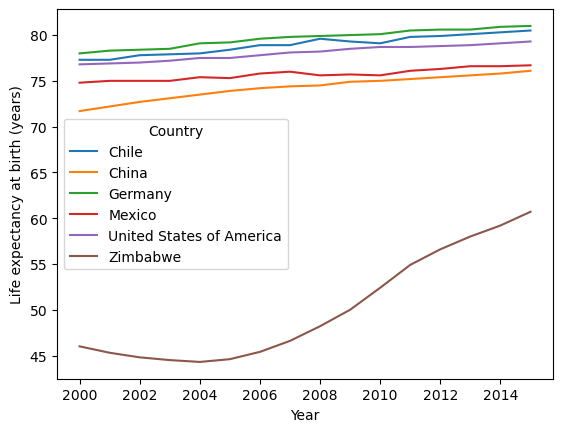

In [52]:
sns.lineplot(x='Year', y='Life expectancy at birth (years)', hue='Country', data=df_main)

In [64]:
df_Zimbabwe = df_main.loc[df_main['Country'] =='Zimbabwe']
df_Zimbabwe.shape
print(df_Zimbabwe)


     Country  Year  Life expectancy at birth (years)           GDP
80  Zimbabwe  2000                              46.0  6.689958e+09
81  Zimbabwe  2001                              45.3  6.777385e+09
82  Zimbabwe  2002                              44.8  6.342116e+09
83  Zimbabwe  2003                              44.5  5.727592e+09
84  Zimbabwe  2004                              44.3  5.805598e+09
85  Zimbabwe  2005                              44.6  5.755215e+09
86  Zimbabwe  2006                              45.4  5.443896e+09
87  Zimbabwe  2007                              46.6  5.291950e+09
88  Zimbabwe  2008                              48.2  4.415703e+09
89  Zimbabwe  2009                              50.0  8.621574e+09
90  Zimbabwe  2010                              52.4  1.014186e+10
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177

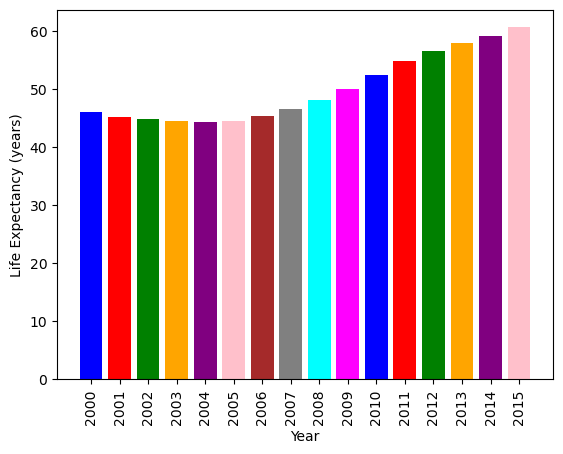

In [80]:
color = ['blue', 'red', 'green', 'orange', 'purple', 'pink', 'brown', 'gray', 'cyan', 'magenta']
plt.bar(df_Zimbabwe['Year'], df_Zimbabwe['Life expectancy at birth (years)'], color = color)
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.xticks(df_main['Year'].unique(), rotation=90)
plt.show()